In [56]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import pandas as pd

In [58]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [59]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [60]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [61]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [62]:
# We can view all of the classes that automap found
Base.classes.keys( )

['measurement', 'station']

In [63]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [64]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [65]:
# Display the row's columns and data in measurement table
first_row = session.query(measurement).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1642a9621c0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [66]:
# Find last date rain measure was taken
# Calculate the date 1 year ago from the last data point in the database
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [67]:
# Count measurement entries was taken
session.query(measurement).count()

19550

In [68]:
# Design a query to retrieve the last 12 months (from 8-23-16 to 8-23-17) of precipitation data and plot the results 
# one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
last_12_months_rain = session.query(measurement).filter(measurement.prcp).order_by(measurement.date > '2016-08-22').count()
last_12_months_rain

9918

In [69]:
# Plot the last 12 months (from 8-23-16 to 8-23-17) of precipitation data
measure_date_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-08-22').order_by(measurement.date).all()
#measure_date_prcp 


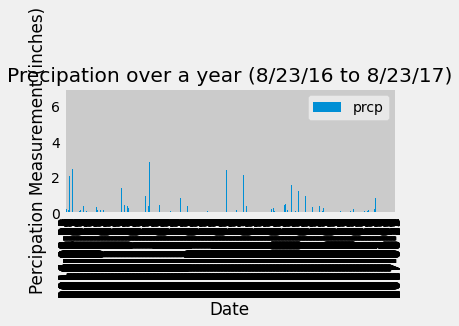

In [70]:
df = pd.DataFrame(measure_date_prcp, columns=['date','prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.title('Precipation over a year (8/23/16 to 8/23/17)')
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Percipation Measurement (inches)")
plt.tight_layout()
plt.show()


In [71]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
year_of_rain_df = pd.DataFrame(measure_date_prcp, columns=['date', 'prcp'])
year_of_rain_df = year_of_rain_df.dropna()
year_of_rain_df.head(10)


date  prcp
0   2016-08-23  0.00
1   2016-08-23  0.15
2   2016-08-23  0.05
4   2016-08-23  0.02
5   2016-08-23  1.79
6   2016-08-23  0.70
7   2016-08-24  0.08
8   2016-08-24  2.15
9   2016-08-24  2.28
11  2016-08-24  1.22

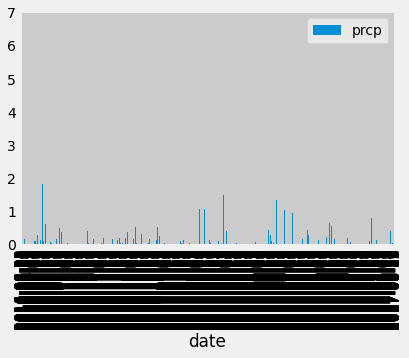

In [72]:
# Use Pandas Plotting with Matplotlib to plot the data
ax1 = year_of_rain_df.plot.bar(x='date', y='prcp')
plt.show()


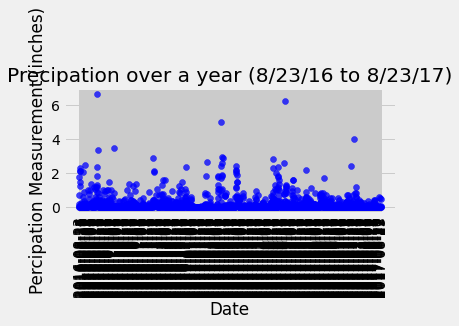

In [73]:
x_axis = year_of_rain_df.date
y_axis = year_of_rain_df.prcp

plt.scatter(x_axis, y_axis, marker='o', facecolor='blue', edgecolors='blue', alpha=0.75)
plt.title('Precipation over a year (8/23/16 to 8/23/17)')
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Percipation Measurement (inches)")
plt.tight_layout()
plt.show()
plt.show()

In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_of_rain_df[['date','prcp']].describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [75]:
# Design a query to show how many stations are available in this dataset?
session.query(measurement.station).group_by(measurement.station).count()

9

In [79]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
